## DFO Nutrient Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools,geo_tools
import datetime
import glob
import gsw
import scipy.optimize as scopt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
fs=8
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
PATH= '/data/eolson/MEOPAR/SS36runs/linkHC201812/'
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2018,12,31)
flen=1
namfmt='nowcast'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'votemper':'grid_T','vosaline':'grid_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'ptrc_T':1,'grid_T':1}

df1=et.loadDFOCTD(datelims=(dt.datetime(2015,1,1),dt.datetime(2019,1,1)))
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Z,SA,CT,dtUTC
0,2015.0,2.0,11.0,5.296111,48.613333,-123.243833,1.983099,29.849611,8.942753,2015-02-11 05:17:46
1,2015.0,2.0,11.0,5.296111,48.613333,-123.243833,2.974641,29.852177,8.942511,2015-02-11 05:17:46
2,2015.0,2.0,11.0,5.296111,48.613333,-123.243833,3.966178,29.869012,8.941135,2015-02-11 05:17:46
3,2015.0,2.0,11.0,5.296111,48.613333,-123.243833,4.957711,29.915690,8.936661,2015-02-11 05:17:46
4,2015.0,2.0,11.0,5.296111,48.613333,-123.243833,5.949239,29.913935,8.936489,2015-02-11 05:17:46


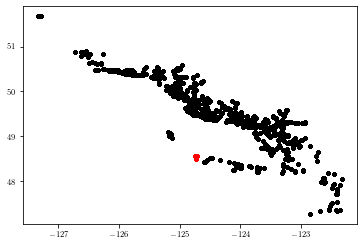

In [3]:
df2=df1.loc[(df1.Lat<48.6)&(df1.Lon<-124.6)]
plt.plot(df1.Lon,df1.Lat,'k.')
plt.plot(df2.Lon,df2.Lat,'r.')

In [4]:
filemapN={'nitrate':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
fdictN={'ptrc_T':1,'grid_T':1}
dfN1=et.loadDFO()

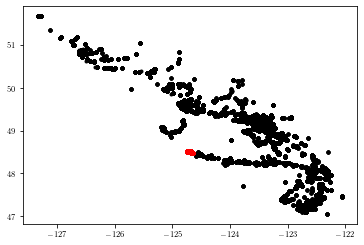

In [5]:
dfN2=dfN1.loc[(dfN1.Lat<48.6)&(dfN1.Lon<-124.6)]
plt.plot(dfN1.Lon,dfN1.Lat,'k.')
plt.plot(dfN2.Lon,dfN2.Lat,'r.')

In [6]:
data=et.matchData(df2,filemap, fdict, start_date, end_date, namfmt, PATH, flen)

In [7]:
dataN=et.matchData(dfN2,filemapN, fdictN, start_date, end_date, namfmt, PATH, flen)

In [8]:
np.max(data['i']),np.min(data['i'])

(16, 7)

In [9]:
data['LOT']=np.zeros(np.shape(data['Lat']))
data['LOS']=np.zeros(np.shape(data['Lat']))
dataN['LON']=np.zeros(np.shape(dataN['Lat']))

In [10]:
zex=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/linkHC201812/05nov15/SalishSea_1d_20151105_20151105_ptrc_T.nc')
zex.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'Fraser_tracer', 'mesozooplankton'])

In [11]:
f=nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201712_y2015m06d05.nc')
print(f.variables.keys())
print(f.variables['xbT'])
f.close()

dict_keys(['time_counter', 'deptht', 'yb', 'xbT', 'vosaline', 'votemper', 'NO3', 'Si', 'OXY', 'DIC', 'TA'])
<class 'netCDF4._netCDF4.Variable'>
int64 xbT(xbT)
unlimited dimensions: 
current shape = (950,)
filling on, default _FillValue of -9223372036854775806 used


In [12]:
mesh=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
tmask=np.copy(mesh.variables['tmask'][0,:,:,:])
mesh.close()

In [13]:
len(tmask[0,376:471,1])

95

In [14]:
zex.variables['diatoms'][0,0,376:471,1]

masked_array(data=[0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
                   0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
                   1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 0.e+00,
                   0.e+00

In [15]:
#'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201712_y2016m09d26.nc'
for i,r in data.iterrows():
    stencil='/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201712_{}.nc'
    try:
        file=glob.glob(stencil.format(r['dtUTC'].strftime('y%Ym%md%d')))[0]

    except:
        print('file does not exist:  '+stencil.format(r['dtUTC'].strftime('y%Ym%md%d')))
        raise
    k=et._getZInd_bin(r['Z'],zex)
    boundlats=zex.variables['nav_lat'][376:471,0:2]*tmask[k,376:471,0:2]
    boundlons=zex.variables['nav_lon'][376:471,0:2]*tmask[k,376:471,0:2]
    j,ix=geo_tools.find_closest_model_point(r['Lon'],r['Lat'],boundlons,boundlats,grid='BC',
                                         tols={'BC':{'tol_lon':.1,'tol_lat':.1}});
    with nc.Dataset(file) as f:
        nT=f.variables['votemper'][0,k,0,j]
        nS=f.variables['vosaline'][0,k,0,j]
        if i<10:
            print(i,nT,nS)
    data.loc[i,['LOT']]=nT
    data.loc[i,['LOS']]=nS

0 11.292802036348784 28.403126022029856
1 11.309100911788189 28.42112210812418
2 11.323397671990476 28.468427137286234
3 11.322674232939876 28.544871954760772
4 11.31066803655307 28.644785523678088
5 11.268476092658872 28.775684788519683
6 11.223672406966093 28.909666451931592
7 11.153274227048287 29.06574562115335
8 11.081955298267932 29.222080920609233
9 11.005842331606775 29.38181993911784


In [16]:
for i,r in dataN.iterrows():
    stencil='/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201712_{}.nc'
    try:
        file=glob.glob(stencil.format(r['dtUTC'].strftime('y%Ym%md%d')))[0]

    except:
        print('file does not exist:  '+stencil.format(r['dtUTC'].strftime('y%Ym%md%d')))
        raise
    k=et._getZInd_bin(r['Z'],zex)
    boundlats=zex.variables['nav_lat'][376:471,0:2]*tmask[k,376:471,0:2]
    boundlons=zex.variables['nav_lon'][376:471,0:2]*tmask[k,376:471,0:2]
    j,ix=geo_tools.find_closest_model_point(r['Lon'],r['Lat'],boundlons,boundlats,grid='BC',
                                         tols={'BC':{'tol_lon':.1,'tol_lat':.1}});
    with nc.Dataset(file) as f:
        #nT=f.variables['votemper'][0,k,0,j]
        #nS=f.variables['vosaline'][0,k,0,j]
        nN=f.variables['NO3'][0,k,0,j]
        if i<10:
            print(i,nT,nS)
    #dataN.loc[i,['LOT']]=nT
    #dataN.loc[i,['LOS']]=nS
    dataN.loc[i,['LON']]=nN

0 6.744222258917862 33.91430947653862
1 6.744222258917862 33.91430947653862
2 6.744222258917862 33.91430947653862
3 6.744222258917862 33.91430947653862
4 6.744222258917862 33.91430947653862
5 6.744222258917862 33.91430947653862
6 6.744222258917862 33.91430947653862
7 6.744222258917862 33.91430947653862
8 6.744222258917862 33.91430947653862
9 6.744222258917862 33.91430947653862


In [17]:
dataN.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,ConsT,Z,dtUTC,j,i,mod_nitrate,mod_vosaline,mod_votemper,k,LON
0,2015.0,4.0,2.0,15.396111,48.499833,-124.733167,1.6,NaN,NaN,None,...,10.547005,1.586497,2015-04-02 15:23:46,413,7,5.142227,28.772097,11.000047,1,2.893599
1,2015.0,4.0,2.0,15.396111,48.499833,-124.733167,5.9,NaN,NaN,None,...,10.533526,5.850147,2015-04-02 15:23:46,413,7,5.293305,28.810715,11.014296,5,4.134447
2,2015.0,4.0,2.0,15.396111,48.499833,-124.733167,12.1,NaN,NaN,None,...,10.288851,11.997578,2015-04-02 15:23:46,413,7,6.475900,29.178440,10.988969,11,8.204390
3,2015.0,4.0,2.0,15.396111,48.499833,-124.733167,21.2,NaN,NaN,None,...,9.419869,21.020086,2015-04-02 15:23:46,413,7,13.461176,30.565741,10.128565,19,16.502173
4,2015.0,4.0,2.0,15.396111,48.499833,-124.733167,31.0,NaN,NaN,None,...,9.192741,30.736187,2015-04-02 15:23:46,413,7,16.946976,31.144781,9.624642,21,17.403508


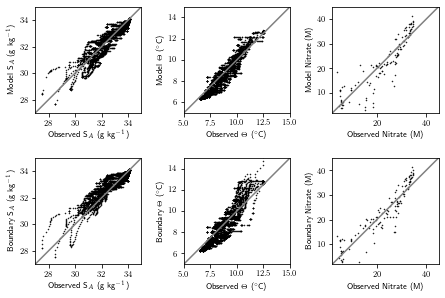

In [19]:
fig=plt.figure(figsize=(7,4.5))
gs = gridspec.GridSpec(2,3,left=.1,right=.9,hspace=.4,wspace=.4,bottom=.1,top=.9)
ax=list()
ax.append(fig.add_subplot(gs[0,0]))
ax.append(fig.add_subplot(gs[0,1]))
ax.append(fig.add_subplot(gs[0,2]))
ax.append(fig.add_subplot(gs[1,0]))
ax.append(fig.add_subplot(gs[1,1]))
ax.append(fig.add_subplot(gs[1,2]))
ms=1
ax[0].plot(data['SA'],data['mod_vosaline'],'k.',ms=ms)
ax[0].set_xlabel('Observed S$_A$ (g kg$^{-1}$)')
ax[0].set_ylabel('Model S$_A$ (g kg$^{-1}$)')

ax[1].plot(data['CT'],data['mod_votemper'],'k.',ms=ms)
ax[1].set_xlabel('Observed $\Theta$ ($^{\circ}$C)')
ax[1].set_ylabel('Model $\Theta$ ($^{\circ}$C)')

ax[2].plot(dataN['N'],dataN['mod_nitrate'],'k.',ms=ms)
ax[2].set_xlabel('Observed Nitrate (M)')
ax[2].set_ylabel('Model Nitrate (M)')

ax[3].plot(data['SA'],data['LOS'],'k.',ms=ms)
ax[3].set_xlabel('Observed S$_A$ (g kg$^{-1}$)')
ax[3].set_ylabel('Boundary S$_A$ (g kg$^{-1}$)')

ax[4].plot(data['CT'],data['LOT'],'k.',ms=ms)
ax[4].set_xlabel('Observed $\Theta$ ($^{\circ}$C)')
ax[4].set_ylabel('Boundary $\Theta$ ($^{\circ}$C)')

ax[5].plot(dataN['N'],dataN['LON'],'k.',ms=ms)
ax[5].set_xlabel('Observed Nitrate (M)')
ax[5].set_ylabel('Boundary Nitrate (M)')
for iax in (ax[0],ax[3]):
    iax.set_aspect(1)
    iax.set_xlim(27,35)
    iax.set_ylim(27,35)
    iax.plot((27,35),(27,35),'-',color='gray')
for iax in (ax[1],ax[4]):
    iax.set_aspect(1)
    iax.set_xlim(5,15)
    iax.set_ylim(5,15)
    iax.plot((5,15),(5,15),'-',color='gray')
for iax in (ax[2],ax[5]):
    iax.set_aspect(1)
    iax.set_xlim(2,45)
    iax.set_ylim(2,45)
    iax.plot((2,45),(2,45),'-',color='gray')
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/response/boundaryComp.pdf',dpi=300)